 # Logistics Regression with TensorFlow
 - Binary Classification Technique
 - Predicts the line which separates data into two classes
 - Sigmoid function output is between 0 & 1
 - this transforms linear output into 0 & 1 using sigmoid function.
 - Generally, above 0.5 means one class & below 0.5 means another class

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import normalize
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()

C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\pulkit.goel\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
bc = datasets.load_breast_cancer()
bc.data.shape

(569, 30)

In [3]:
x_vals = bc.data

In [4]:
y_vals = bc.target

In [5]:
train_indices = np.random.choice(len(x_vals),round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) -set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]


In [7]:
batch_size = 25
x_data = tf.placeholder(shape=[None,30], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[30,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))
model_output=tf.add(tf.matmul(x_data,A),b)

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= model_output,labels= y_target))

init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [13]:
#help(tf.nn.sigmoid_cross_entropy_with_logits)

In [14]:
prediction = tf.round(tf.sigmoid(model_output))

predictions_correct = tf.cast(tf.equal(prediction,y_target),tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [17]:
loss_vec = []
train_acc = []
test_acc = []
for i in range(2000):
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    rand_x =x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    
    sess.run(train_step,feed_dict={x_data:rand_x,y_target:rand_y})
    
    temp_loss = sess.run(loss,feed_dict={x_data:rand_x,y_target:rand_y})
    loss_vec.append(temp_loss)
    
    temp_acc_train = sess.run(accuracy,feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
    
    train_acc.append(temp_acc_train)
    
    temp_acc_test = sess.run(accuracy,feed_dict={x_data:x_vals_test,y_target:np.transpose([y_vals_test])})
    
    test_acc.append(temp_acc_test)

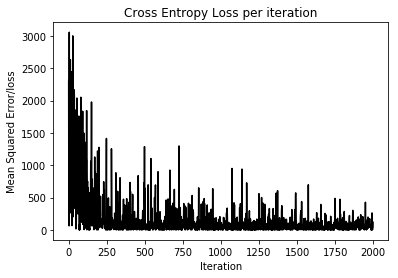

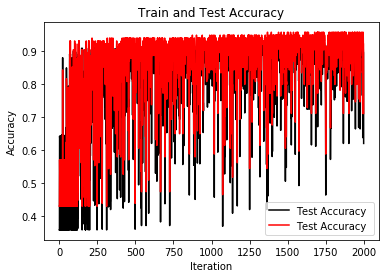

In [19]:
plt.plot(loss_vec,'k-')
plt.title("Cross Entropy Loss per iteration")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error/loss")
plt.show()
plt.plot(train_acc,'k-',label= 'Test Accuracy ')
plt.plot(test_acc,'r-',label= 'Test Accuracy ')
plt.title("Train and Test Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.show()
